# LSTM

**Anggota Kelompok 5 :**
1. Jihan Husnia Utomo           (5026211019)
2. Nabilla Sabta Putri Pramesty (5026211043)
3. Annisa Mufidatun Sholihah    (5026211089)

# Import Library

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as sm
import tensorflow as tf
import seaborn as sns
import sklearn.preprocessing
from tabulate import tabulate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

# Preprocessing Data

In [ ]:
jatim = pd.read_csv('Jatim 2015 - 2022.csv')
jatim.head()

,datetime,total_visitor,total_accomodation
0,1/1/2014,16870,17382
1,2/1/2014,16476,17592
2,3/1/2014,18776,18192
3,4/1/2014,19145,18472
4,5/1/2014,20299,18790


In [ ]:
jatim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   datetime            108 non-null    object
 1   total_visitor       108 non-null    int64 
 2   total_accomodation  108 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.7+ KB


In [ ]:
# check number of nan values in dataframe
jatim.isna().sum()

datetime              0
total_visitor         0
total_accomodation    0
dtype: int64

In [ ]:
#cek duplicates
duplicate_rows = jatim.duplicated().sum()
duplicate_rows

0

In [ ]:
jatim['datetime'] = pd.to_datetime(jatim['datetime'])
jatim.head()

,datetime,total_visitor,total_accomodation
0,2014-01-01,16870,17382
1,2014-02-01,16476,17592
2,2014-03-01,18776,18192
3,2014-04-01,19145,18472
4,2014-05-01,20299,18790


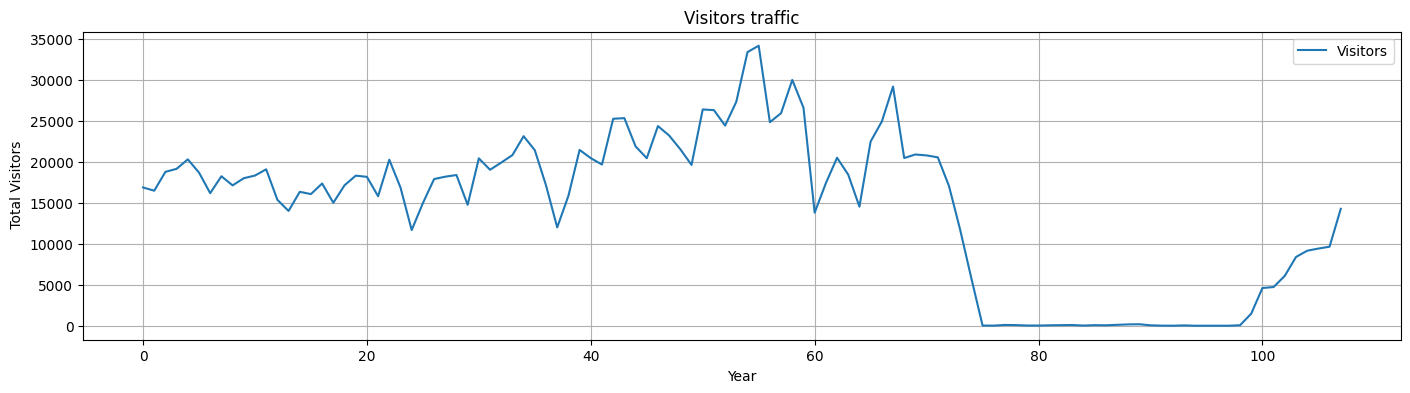

In [ ]:
# Plot the time series
plt.figure(figsize=(17, 4))
plt.plot(jatim['total_visitor'], label='Visitors')
plt.grid()
plt.xlabel('Year')
plt.ylabel(" Total Visitors")
plt.legend()
plt.title('Visitors traffic')
plt.show()

In [ ]:
jatim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            108 non-null    datetime64[ns]
 1   total_visitor       108 non-null    int64         
 2   total_accomodation  108 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.7 KB


In [ ]:
jatim

,datetime,total_visitor,total_accomodation
0,2014-01-01,16870,17382
1,2014-02-01,16476,17592
2,2014-03-01,18776,18192
3,2014-04-01,19145,18472
4,2014-05-01,20299,18790
...,...,...,...
103,2022-08-01,8386,58532
104,2022-09-01,9152,59224
105,2022-10-01,9415,59679
106,2022-11-01,9644,60021


## Prepare data untuk training


In [ ]:
#memisahkan kolom data untuk plotting kedepannya
train_dates = pd.to_datetime(jatim['datetime'])
print(train_dates.tail(24)) #Check last few dates.

84    2021-01-01
85    2021-02-01
86    2021-03-01
87    2021-04-01
88    2021-05-01
89    2021-06-01
90    2021-07-01
91    2021-08-01
92    2021-09-01
93    2021-10-01
94    2021-11-01
95    2021-12-01
96    2022-01-01
97    2022-02-01
98    2022-03-01
99    2022-04-01
100   2022-05-01
101   2022-06-01
102   2022-07-01
103   2022-08-01
104   2022-09-01
105   2022-10-01
106   2022-11-01
107   2022-12-01
Name: datetime, dtype: datetime64[ns]


In [ ]:
#membuat variabel untuk training
cols = list(jatim)[1:3]
print(cols)

['total_visitor', 'total_accomodation']


In [ ]:
# menyamakan tipe data
df_for_training = jatim[cols].astype(float)

In [ ]:
#scaler data
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

# Membangun Model Prediksi

### Skenario 1: 80% training : 20% testing

In [ ]:
train_size = int(0.8 * len(df_for_training_scaled))
X_train, y_train = df_for_training_scaled[:train_size], df_for_training_scaled[:train_size]
X_test, y_test = df_for_training_scaled[train_size:], df_for_training_scaled[train_size:]

X_train, y_train, X_test, y_test = np.array(X_train), np.array(y_train),np.array(X_test), np.array(y_test)

In [ ]:
print("Train X shape:", X_train.shape)
print("Train Y shape:", y_train.shape)
print("Test X shape:", X_test.shape)
print("Test Y shape:", y_test.shape)

Train X shape: (86, 2)
Train Y shape: (86, 2)
Test X shape: (22, 2)
Test Y shape: (22, 2)


In [ ]:
#cek apakah suda berbentuk array
y_test

array([[-1.53470377,  1.05349863],
       [-1.52870659,  1.10324225],
       [-1.52313778,  1.11604449],
       [-1.52088884,  1.13401389],
       [-1.53470377,  1.16123792],
       [-1.53920166,  1.17180362],
       [-1.5400584 ,  1.20882212],
       [-1.53631016,  1.23527493],
       [-1.54027258,  1.27908017],
       [-1.54027258,  1.31648429],
       [-1.54027258,  1.35088065],
       [-1.54027258,  1.3961512 ],
       [-1.53416831,  1.43733429],
       [-1.38306081,  1.48167938],
       [-1.04786132,  1.53612744],
       [-1.03458185,  1.56335147],
       [-0.88840061,  1.5898814 ],
       [-0.64219498,  1.63091025],
       [-0.56016213,  1.6842786 ],
       [-0.53199681,  1.71936906],
       [-0.50747263,  1.74574475],
       [-0.01270533,  2.60812176]])

In [ ]:
# Build the LSTM model
model = Sequential()
# First LSTM layer
model.add(LSTM(32, activation='tanh',input_shape=(X_train.shape[1], 1), return_sequences=True))
# Second LSTM layer
model.add(LSTM(16, activation='tanh'))
# Output layer
model.add(Dense(2))
#model.add(Dense(y_train.shape[0]))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 2, 32)             4352      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 dense (Dense)               (None, 2)                 34        
                                                                 
Total params: 7522 (29.38 KB)
Trainable params: 7522 (29.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
2/2 [==============================] - 7s 2s/step - loss: 0.6881 - val_loss: 1.0696
Epoch 2/100
2/2 [==============================] - 0s 89ms/step - loss: 0.6792 - val_loss: 1.0757
Epoch 3/100
2/2 [==============================] - 0s 68ms/step - loss: 0.6704 - val_loss: 1.0817
Epoch 4/100
2/2 [==============================] - 0s 75ms/step - loss: 0.6615 - val_loss: 1.0875
Epoch 5/100
2/2 [==============================] - 0s 92ms/step - loss: 0.6525 - val_loss: 1.0934
Epoch 6/100
2/2 [==============================] - 0s 75ms/step - loss: 0.6435 - val_loss: 1.0994


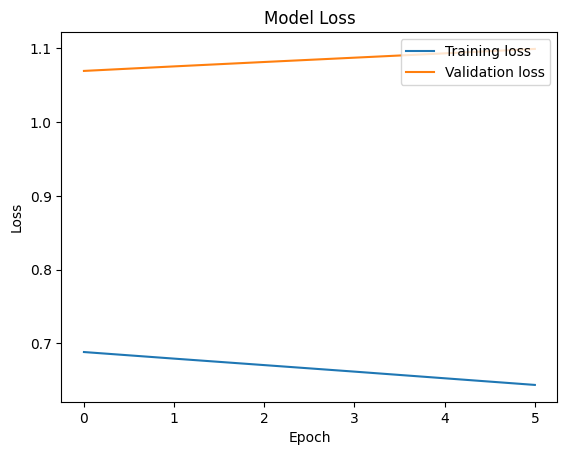

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [ ]:
from tabulate import tabulate

In [ ]:
# menyimpan variabel
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# membuat tabel
loss_table = []

for epoch in range(len(train_loss)):
    loss_table.append([epoch+1, train_loss [epoch], val_loss [epoch]])

headers = ["Epoch", "Train Loss", "Validation Loss"]

print(tabulate(loss_table, headers=headers, tablefmt='fancy_grid'))

╒═════════╤══════════════╤═══════════════════╕
│   Epoch │   Train Loss │   Validation Loss │
╞═════════╪══════════════╪═══════════════════╡
│       1 │     0.68811  │           1.06956 │
├─────────┼──────────────┼───────────────────┤
│       2 │     0.679172 │           1.07571 │
├─────────┼──────────────┼───────────────────┤
│       3 │     0.67038  │           1.08168 │
├─────────┼──────────────┼───────────────────┤
│       4 │     0.661531 │           1.08753 │
├─────────┼──────────────┼───────────────────┤
│       5 │     0.6525   │           1.09341 │
├─────────┼──────────────┼───────────────────┤
│       6 │     0.64349  │           1.09941 │
╘═════════╧══════════════╧═══════════════════╛


In [ ]:
# Make predictions on the test set
pred = model.predict(X_test)

print("shape:", pred.shape)

1/1 [==============================] - 1s 1s/step
shape: (22, 2)


In [ ]:
# Inverse transform the scaled predictions to original scale
y_pred = scaler.inverse_transform(pred)

In [ ]:
y_pred = pd.DataFrame(y_pred, columns=['total_visitor','total_accomodation'])
y_pred

,total_visitor,total_accomodation
0,14416.720703,37313.203125
1,14416.498047,37314.355469
2,14416.494141,37314.718750
3,14416.418945,37315.136719
4,14416.083008,37315.496094
5,14415.964844,37315.648438
6,14415.748047,37316.429688
7,14415.655273,37317.058594
8,14415.374023,37317.941406
9,14415.185547,37318.750000


In [ ]:
y_test = scaler.inverse_transform(y_test)

In [ ]:
y_test = pd.DataFrame(y_test, columns=['total_visitor','total_accomodation'])
y_test

,total_visitor,total_accomodation
0,52.0,51045.0
1,108.0,51690.0
2,160.0,51856.0
3,181.0,52089.0
4,52.0,52442.0
5,10.0,52579.0
6,2.0,53059.0
7,37.0,53402.0
8,0.0,53970.0
9,0.0,54455.0


In [ ]:
#calculate the accuration

lstm_mse_1 =  round(sm.mean_squared_error(y_test, y_pred), 2)
lstm_mae_1 = round(sm.mean_absolute_error(y_test, y_pred), 2)
lstm_mape_1 = np.round(np.mean(np.abs((y_test) - y_pred )/y_test)*100,2)
lstm_rmse_1 =  np.sqrt(mean_squared_error(y_test, y_pred)).round(2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
eror = pd.DataFrame({'Method':['MSE', 'MAE', 'MAPE', 'RMSE'],
                     'Eror': [lstm_mse_1,lstm_mae_1,lstm_mape_1, lstm_rmse_1]})

eror = eror[['Method', 'Eror' ]]
eror

,Method,Eror
0,MSE,256172389.79
1,MAE,14973.69
2,MAPE,total_visitor inf total_accomodation...
3,RMSE,16005.39


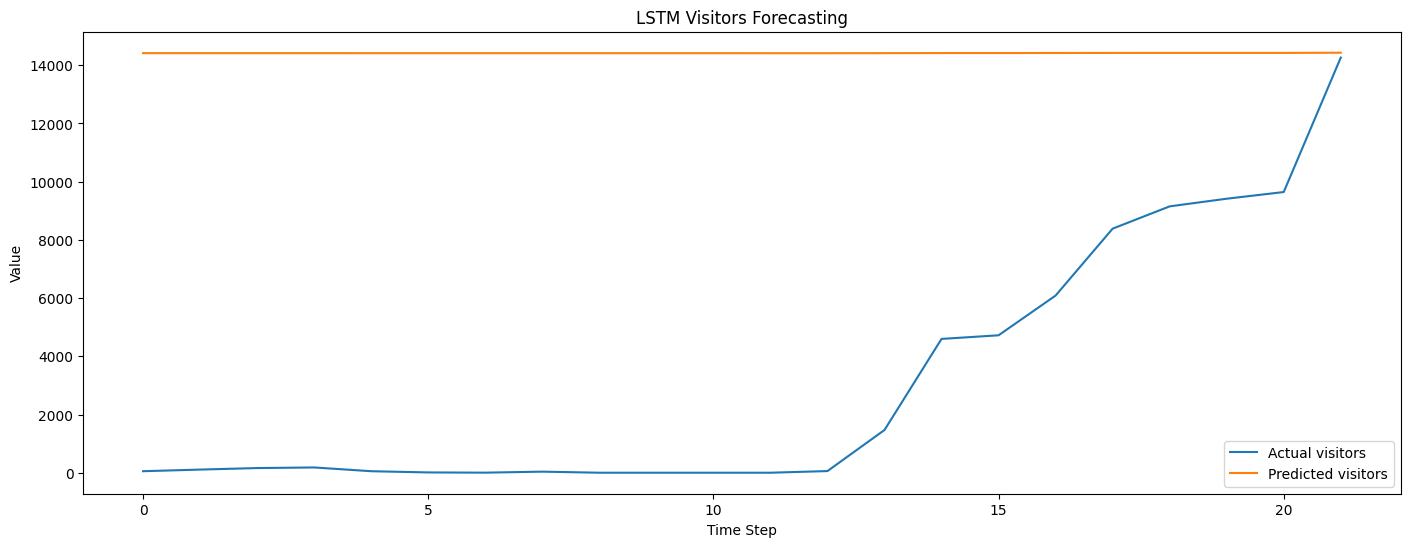

In [ ]:
plt.figure(figsize=(17, 6))

plt.plot(y_test['total_visitor'], label='Actual visitors')
plt.plot(y_pred['total_visitor'], label='Predicted visitors')

plt.title('LSTM Visitors Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.show()

In [ ]:
a = y_test['total_visitor']
b = y_pred['total_visitor']
c = a - b

hasil_model = {'data aktual': a, 'data prediksi': b, 'loss (perbedaan)': c}
hasil_model = pd.DataFrame(hasil_model)

hasil_model

,data aktual,data prediksi,loss (perbedaan)
0,52.0,14416.720703,-14364.720703
1,108.0,14416.498047,-14308.498047
2,160.0,14416.494141,-14256.494141
3,181.0,14416.418945,-14235.418945
4,52.0,14416.083008,-14364.083008
5,10.0,14415.964844,-14405.964844
6,2.0,14415.748047,-14413.748047
7,37.0,14415.655273,-14378.655273
8,0.0,14415.374023,-14415.374023
9,0.0,14415.185547,-14415.185547


In [ ]:
n_past = 1
n_month_for_prediction = 12
predict_period_month = pd.date_range(list(train_dates)[-n_past],
                                     periods=n_month_for_prediction, freq='M').tolist()
print(predict_period_month)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
prediction = model.predict(X_train[-n_month_for_prediction:])

1/1 [==============================] - 0s 33ms/step


In [ ]:
prediction

array([[ 0.00464982, -0.00548551],
       [ 0.00395355, -0.00618825],
       [ 0.00392026, -0.00612826],
       [ 0.00390293, -0.00605909],
       [ 0.0038663 , -0.00599468],
       [ 0.0038191 , -0.00592005],
       [ 0.00380676, -0.00589591],
       [ 0.0037841 , -0.0058333 ],
       [ 0.00376524, -0.00578449],
       [ 0.00372847, -0.00569456],
       [ 0.0036844 , -0.00562292],
       [ 0.00366999, -0.00556442]], dtype=float32)

In [ ]:
#mengambil kolom total visitor saja
prediction = scaler.inverse_transform(prediction)[:,0]
prediction

array([14426.058, 14419.556, 14419.245, 14419.083, 14418.741, 14418.301,
       14418.186, 14417.974, 14417.798, 14417.454, 14417.043, 14416.908],
      dtype=float32)

<ipython-input-37-e88e972f5969>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


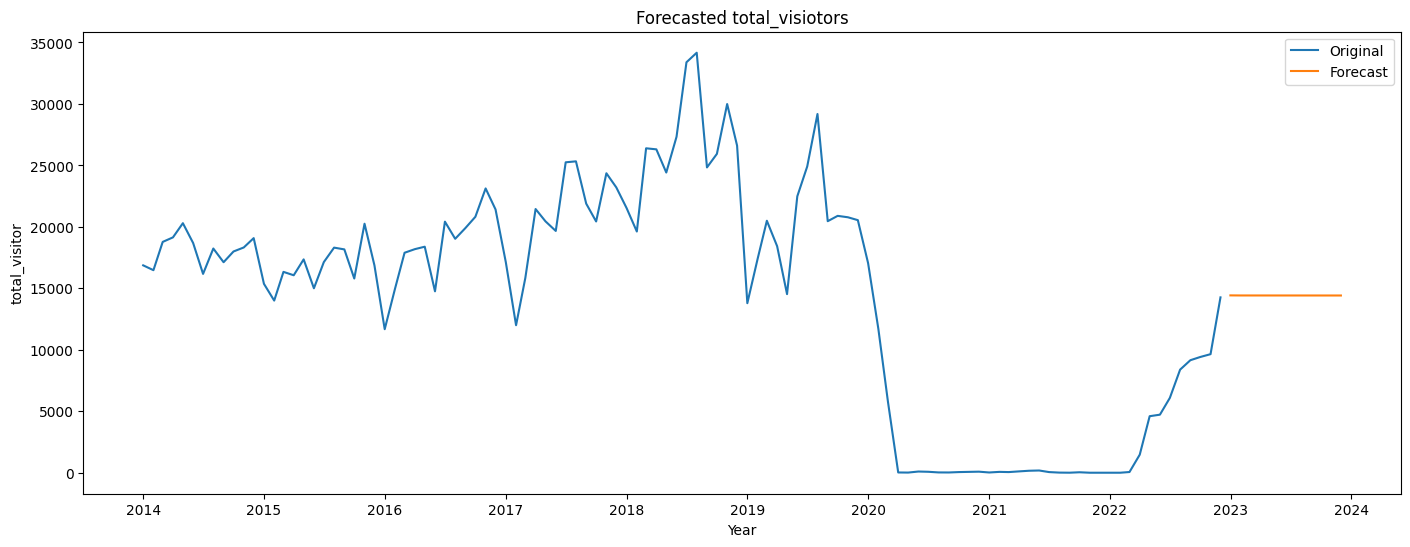

In [ ]:
forecast_dates = []

for time_i in predict_period_month:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': prediction})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original = jatim[['datetime','total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']


#plot hasil
plt.figure(figsize=(17, 6))
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('total_visitor')
plt.title('Forecasted total_visiotors')
plt.legend()
plt.show()

# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, prediction))

In [ ]:
from tabulate import tabulate

In [ ]:
# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      14426.1 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │      14419.6 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │      14419.2 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │      14419.1 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │      14418.7 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │      14418.3 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      14418.2 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │      14418   │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │      14417.8 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │      14417.5 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │      14417   │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

### Skenario 2: 70% training : 30% testing

In [ ]:
train_size = int(0.7 * len(df_for_training_scaled))
X_train2, y_train2 = df_for_training_scaled[:train_size], df_for_training_scaled[:train_size]
X_test2, y_test2 = df_for_training_scaled[train_size:], df_for_training_scaled[train_size:]

X_train2, y_train2, X_test2, y_test2 = np.array(X_train2), np.array(y_train2),
                                          np.array(X_test2), np.array(y_test2)

In [ ]:
print("Train X shape:", X_train2.shape)
print("Train Y shape:", y_train2.shape)
print("Test X shape:", X_test2.shape)
print("Test Y shape:", y_test2.shape)

Train X shape: (75, 2)
Train Y shape: (75, 2)
Test X shape: (33, 2)
Test Y shape: (33, 2)


In [ ]:
#cek apakah suda berbentuk array
y_test2

array([[-1.53802364,  0.63758026],
       [-1.53898747,  0.67722091],
       [-1.52988461,  0.71447079],
       [-1.53213355,  0.75742768],
       [-1.53770236,  0.80917647],
       [-1.53813073,  0.8247551 ],
       [-1.53470377,  0.86146512],
       [-1.5328832 ,  0.89061719],
       [-1.53116972,  0.94529662],
       [-1.53813073,  0.99496311],
       [-1.5328832 ,  1.0269687 ],
       [-1.53470377,  1.05349863],
       [-1.52870659,  1.10324225],
       [-1.52313778,  1.11604449],
       [-1.52088884,  1.13401389],
       [-1.53470377,  1.16123792],
       [-1.53920166,  1.17180362],
       [-1.5400584 ,  1.20882212],
       [-1.53631016,  1.23527493],
       [-1.54027258,  1.27908017],
       [-1.54027258,  1.31648429],
       [-1.54027258,  1.35088065],
       [-1.54027258,  1.3961512 ],
       [-1.53416831,  1.43733429],
       [-1.38306081,  1.48167938],
       [-1.04786132,  1.53612744],
       [-1.03458185,  1.56335147],
       [-0.88840061,  1.5898814 ],
       [-0.64219498,

In [ ]:
# Build the LSTM model
model2 = Sequential()
# First LSTM layer
model2.add(LSTM(32, activation='tanh',input_shape=(X_train2.shape[1], 1), return_sequences=True))
# Second LSTM layer
model2.add(LSTM(16, activation='tanh'))
# Output layer
model2.add(Dense(2))
#model.add(Dense(y_train.shape[0]))

model2.compile(optimizer='adam', loss='mse')

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 2, 32)             4352      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 2)                 34        
                                                                 
Total params: 7522 (29.38 KB)
Trainable params: 7522 (29.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model2.fit(
    X_train2, y_train2,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 0.7246 - val_loss: 0.3429
Epoch 2/100
1/1 [==============================] - 0s 176ms/step - loss: 0.7195 - val_loss: 0.3423
Epoch 3/100
1/1 [==============================] - 0s 158ms/step - loss: 0.7145 - val_loss: 0.3418
Epoch 4/100
1/1 [==============================] - 0s 97ms/step - loss: 0.7094 - val_loss: 0.3413
Epoch 5/100
1/1 [==============================] - 0s 256ms/step - loss: 0.7044 - val_loss: 0.3408
Epoch 6/100
1/1 [==============================] - 0s 224ms/step - loss: 0.6993 - val_loss: 0.3403
Epoch 7/100
1/1 [==============================] - 0s 286ms/step - loss: 0.6942 - val_loss: 0.3398
Epoch 8/100
1/1 [==============================] - 0s 249ms/step - loss: 0.6890 - val_loss: 0.3394
Epoch 9/100
1/1 [==============================] - 0s 287ms/step - loss: 0.6838 - val_loss: 0.3389
Epoch 10/100
1/1 [==============================] - 0s 225ms/step - loss: 0.6786 - val_loss: 0.3385
Epoch 11/10

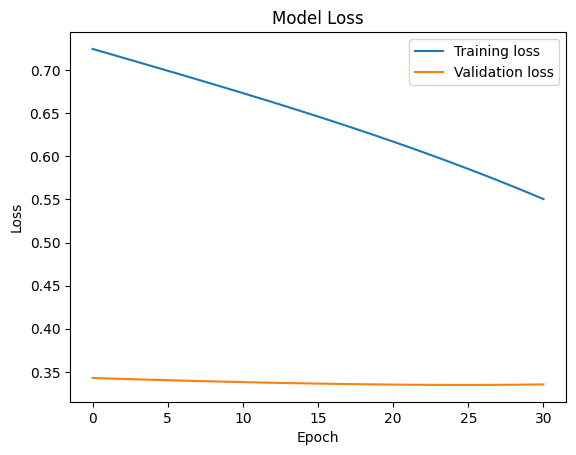

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [ ]:
# Retrieve loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a table with loss values
loss_table = []

for epoch in range(len(train_loss)):
    loss_table.append([epoch+1, train_loss [epoch], val_loss [epoch]])

headers = ["Epoch", "Train Loss", "Validation Loss"]

# Print the loss table using tabulate
print(tabulate(loss_table, headers=headers, tablefmt='fancy_grid'))

╒═════════╤══════════════╤═══════════════════╕
│   Epoch │   Train Loss │   Validation Loss │
╞═════════╪══════════════╪═══════════════════╡
│       1 │     0.724605 │          0.34289  │
├─────────┼──────────────┼───────────────────┤
│       2 │     0.71955  │          0.34234  │
├─────────┼──────────────┼───────────────────┤
│       3 │     0.714496 │          0.341807 │
├─────────┼──────────────┼───────────────────┤
│       4 │     0.709437 │          0.341289 │
├─────────┼──────────────┼───────────────────┤
│       5 │     0.704365 │          0.340787 │
├─────────┼──────────────┼───────────────────┤
│       6 │     0.699276 │          0.340299 │
├─────────┼──────────────┼───────────────────┤
│       7 │     0.694162 │          0.339825 │
├─────────┼──────────────┼───────────────────┤
│       8 │     0.689019 │          0.339367 │
├─────────┼──────────────┼───────────────────┤
│       9 │     0.683841 │          0.338925 │
├─────────┼──────────────┼───────────────────┤
│      10 │  

In [ ]:
# Make predictions on the test set
pred2 = model2.predict(X_test2)

print("shape:", pred2.shape)

2/2 [==============================] - 2s 6ms/step
shape: (33, 2)


In [ ]:
# Inverse transform the scaled predictions to original scale
y_pred2 = scaler.inverse_transform(pred2)

In [ ]:
y_test2 = scaler.inverse_transform(y_test2)

In [ ]:
y_pred2 = pd.DataFrame(y_pred2, columns=['total_visitor','total_accomodation'])
y_pred2

,total_visitor,total_accomodation
0,14477.179688,35499.492188
1,14485.019531,35513.109375
2,14495.557617,35530.550781
3,14503.789062,35544.492188
4,14512.881836,35559.753906
5,14516.026367,35564.902344
6,14524.855469,35579.062500
7,14531.615234,35589.808594
8,14543.828125,35608.988281
9,14552.308594,35622.191406


In [ ]:
y_test2 = pd.DataFrame(y_test2, columns=['total_visitor','total_accomodation'])
y_test2

,total_visitor,total_accomodation
0,21.0,45652.0
1,12.0,46166.0
2,97.0,46649.0
3,76.0,47206.0
4,24.0,47877.0
5,20.0,48079.0
6,52.0,48555.0
7,69.0,48933.0
8,85.0,49642.0
9,20.0,50286.0


In [ ]:
a = y_test2['total_visitor']
b = y_pred2['total_visitor']
c = a - b

hasil_model = {'data aktual': a, 'data prediksi': b, 'loss (perbedaan)': c}
hasil_model = pd.DataFrame(hasil_model)

hasil_model

,data aktual,data prediksi,loss (perbedaan)
0,21.0,14477.179688,-14456.179688
1,12.0,14485.019531,-14473.019531
2,97.0,14495.557617,-14398.557617
3,76.0,14503.789062,-14427.789062
4,24.0,14512.881836,-14488.881836
5,20.0,14516.026367,-14496.026367
6,52.0,14524.855469,-14472.855469
7,69.0,14531.615234,-14462.615234
8,85.0,14543.828125,-14458.828125
9,20.0,14552.308594,-14532.308594


In [ ]:
#calculate the accuration

lstm_mse_2 =  round(sm.mean_squared_error(y_test2, y_pred2), 2)
lstm_mae_2 = round(sm.mean_absolute_error(y_test2, y_pred2), 2)
lstm_mape_2 = np.round(np.mean(np.abs((y_test2) - y_pred2 )/y_test2)*100,2)
lstm_rmse_2 =  np.sqrt(mean_squared_error(y_test2, y_pred2)).round(2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
eror2 = pd.DataFrame({'Method':['MSE', 'MAE', 'MAPE', 'RMSE'], 'Eror': [lstm_mse_2,lstm_mae_2,lstm_mape_2, lstm_rmse_2]})

eror2 = eror2[['Method', 'Eror' ]]
eror2

,Method,Eror
0,MSE,252220893.83
1,MAE,15084.57
2,MAPE,total_visitor inf total_accomodation...
3,RMSE,15881.46


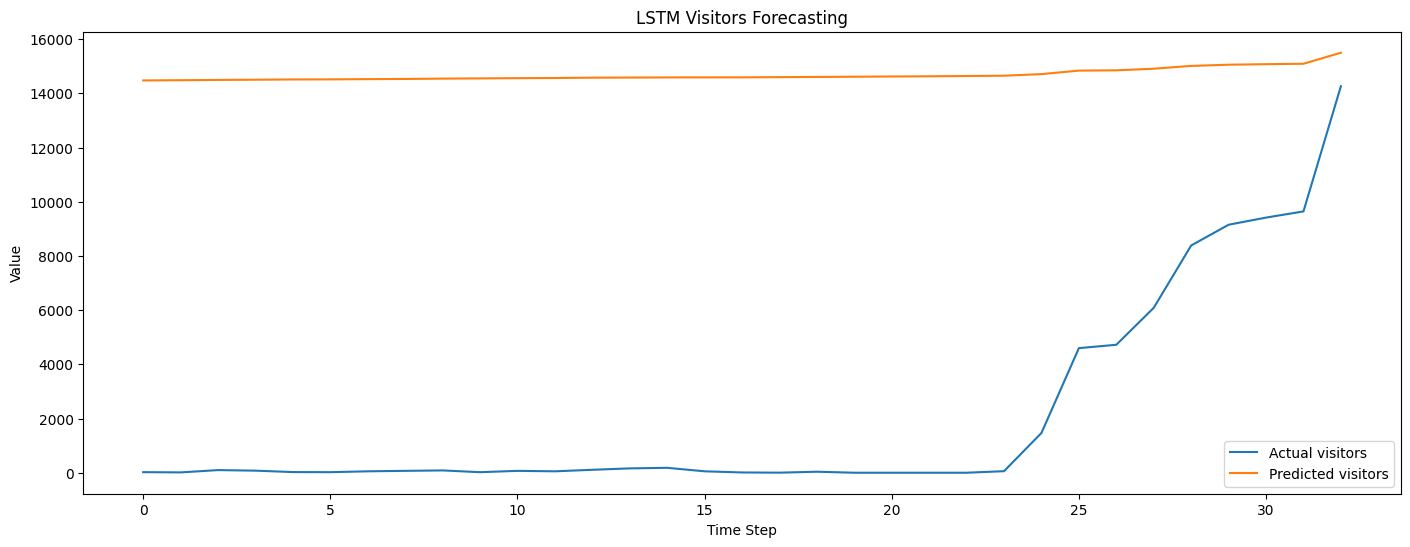

In [ ]:
# Plot the results for both targets (humidity and temperature)
plt.figure(figsize=(17, 6))

plt.plot(y_test2['total_visitor'], label='Actual visitors')
plt.plot(y_pred2['total_visitor'], label='Predicted visitors')

plt.title('LSTM Visitors Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.show()

In [ ]:
n_past2 = 1
n_month_for_prediction2 = 12
predict_period_month2 = pd.date_range(list(train_dates)[-n_past2],
                                     periods=n_month_for_prediction2, freq='M').tolist()
print(predict_period_month2)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
prediction2 = model2.predict(X_train2[-n_month_for_prediction2:])

1/1 [==============================] - 0s 21ms/step


In [ ]:
prediction2

array([[ 0.08153673, -0.0915499 ],
       [ 0.06355433, -0.10221343],
       [ 0.1043359 , -0.07781403],
       [ 0.11755303, -0.07111917],
       [ 0.14092317, -0.06072092],
       [ 0.0958561 , -0.08103678],
       [ 0.09907466, -0.0787283 ],
       [ 0.09871623, -0.07878404],
       [ 0.09797876, -0.07891275],
       [ 0.0815112 , -0.08768743],
       [ 0.05607468, -0.10465109],
       [ 0.03130165, -0.12448534]], dtype=float32)

In [ ]:
#mengambil kolom total visitor saja
prediction2 = scaler.inverse_transform(prediction2)[:,0]
prediction2

array([15144.006 , 14976.092 , 15356.898 , 15480.316 , 15698.54  ,
       15277.717 , 15307.7705, 15304.424 , 15297.537 , 15143.768 ,
       14906.249 , 14674.925 ], dtype=float32)

<ipython-input-61-9f796e485baf>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


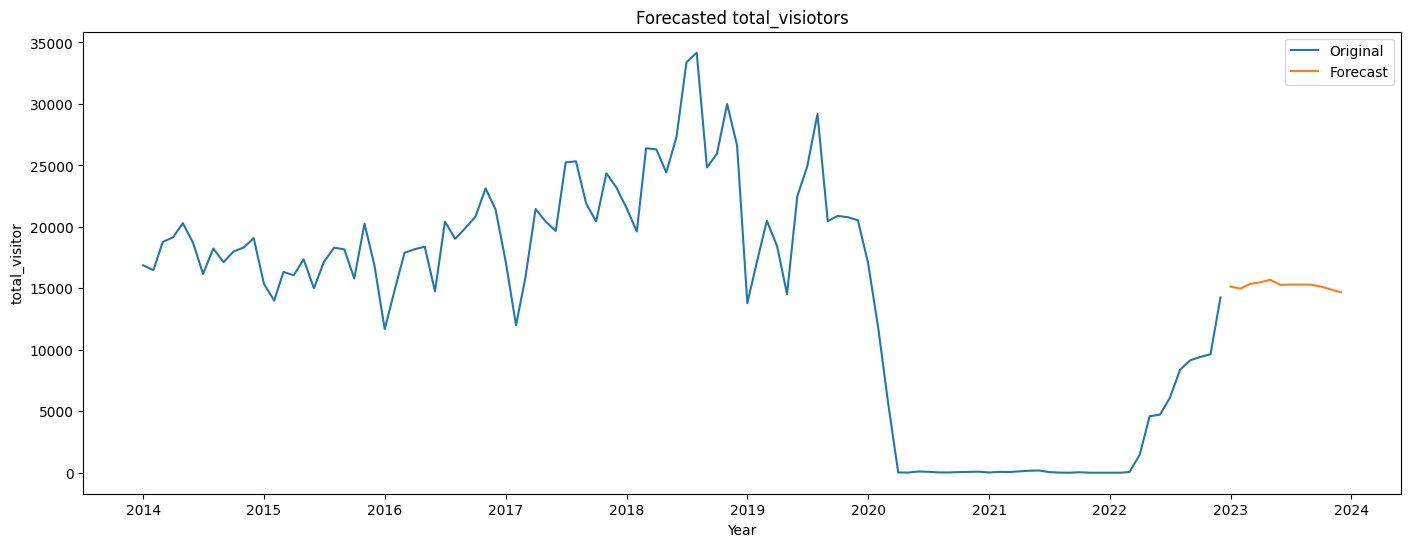

In [ ]:
forecast_dates = []

for time_i in predict_period_month2:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': prediction2})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original = jatim[['datetime','total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']

#plot hasil forecasting
plt.figure(figsize=(17, 6))
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('total_visitor')
plt.title('Forecasted total_visiotors')
plt.legend()
plt.show()


# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, prediction2))

In [ ]:
from tabulate import tabulate

In [ ]:
# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      15144   │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │      14976.1 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │      15356.9 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │      15480.3 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │      15698.5 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │      15277.7 │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      15307.8 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │      15304.4 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │      15297.5 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │      15143.8 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │      14906.2 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  

### Skenario 3: 60% training : 40% testing

In [ ]:
train_size = int(0.6 * len(df_for_training_scaled))
X_train3, y_train3 = df_for_training_scaled[:train_size], df_for_training_scaled[:train_size]
X_test3, y_test3 = df_for_training_scaled[train_size:], df_for_training_scaled[train_size:]

X_train3, y_train3, X_test3, y_test3 = np.array(X_train3), np.array(y_train3),np.array(X_test3),
                                              np.array(y_test3)

In [ ]:
print("Train X shape:", X_train3.shape)
print("Train Y shape:", y_train3.shape)
print("Test X shape:", X_test3.shape)
print("Test Y shape:", y_test3.shape)

Train X shape: (64, 2)
Train Y shape: (64, 2)
Test X shape: (44, 2)
Test Y shape: (44, 2)


In [ ]:
#cek apakah suda berbentuk array
y_test3

array([[ 0.01567418,  0.29107159],
       [ 0.86770201,  0.32693327],
       [ 1.12772257,  0.34929862],
       [ 1.58468622,  0.38600864],
       [ 0.65105391,  0.40999355],
       [ 0.69742495,  0.45179362],
       [ 0.68510932,  0.4615881 ],
       [ 0.66004968,  0.48109994],
       [ 0.28533306,  0.53331146],
       [-0.28729047,  0.54495687],
       [-0.92192056,  0.59547171],
       [-1.53802364,  0.63758026],
       [-1.53898747,  0.67722091],
       [-1.52988461,  0.71447079],
       [-1.53213355,  0.75742768],
       [-1.53770236,  0.80917647],
       [-1.53813073,  0.8247551 ],
       [-1.53470377,  0.86146512],
       [-1.5328832 ,  0.89061719],
       [-1.53116972,  0.94529662],
       [-1.53813073,  0.99496311],
       [-1.5328832 ,  1.0269687 ],
       [-1.53470377,  1.05349863],
       [-1.52870659,  1.10324225],
       [-1.52313778,  1.11604449],
       [-1.52088884,  1.13401389],
       [-1.53470377,  1.16123792],
       [-1.53920166,  1.17180362],
       [-1.5400584 ,

In [ ]:
# Build the LSTM model
model3 = Sequential()
# First LSTM layer
model3.add(LSTM(32, activation='tanh',input_shape=(X_train3.shape[1], 1), return_sequences=True))
# Second LSTM layer
model3.add(LSTM(16, activation='tanh'))
# Output layer
model3.add(Dense(2))
#model.add(Dense(y_train.shape[0]))

model3.compile(optimizer='adam', loss='mse')

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 2, 32)             4352      
                                                                 
 lstm_5 (LSTM)               (None, 16)                3136      
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 7522 (29.38 KB)
Trainable params: 7522 (29.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model3.fit(
    X_train3, y_train3,
    epochs=100,
    batch_size=64,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[early_stopping]
)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.6580 - val_loss: 0.8206
Epoch 2/100
1/1 [==============================] - 0s 58ms/step - loss: 0.6534 - val_loss: 0.8166
Epoch 3/100
1/1 [==============================] - 0s 52ms/step - loss: 0.6489 - val_loss: 0.8125
Epoch 4/100
1/1 [==============================] - 0s 51ms/step - loss: 0.6444 - val_loss: 0.8084
Epoch 5/100
1/1 [==============================] - 0s 52ms/step - loss: 0.6399 - val_loss: 0.8043
Epoch 6/100
1/1 [==============================] - 0s 52ms/step - loss: 0.6353 - val_loss: 0.8001
Epoch 7/100
1/1 [==============================] - 0s 52ms/step - loss: 0.6308 - val_loss: 0.7959
Epoch 8/100
1/1 [==============================] - 0s 66ms/step - loss: 0.6262 - val_loss: 0.7917
Epoch 9/100
1/1 [==============================] - 0s 74ms/step - loss: 0.6216 - val_loss: 0.7874
Epoch 10/100
1/1 [==============================] - 0s 57ms/step - loss: 0.6169 - val_loss: 0.7831
Epoch 11/100
1/1 [===

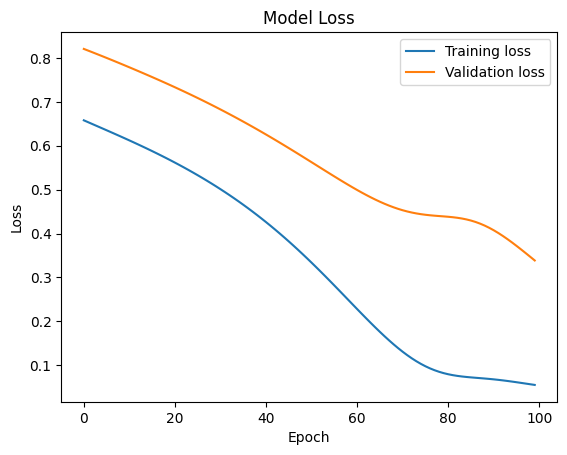

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()

In [ ]:
# Retrieve loss values
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a table with loss values
loss_table = []

for epoch in range(len(train_loss)):
    loss_table.append([epoch+1, train_loss [epoch], val_loss [epoch]])

headers = ["Epoch", "Train Loss", "Validation Loss"]

# Print the loss table using tabulate
print(tabulate(loss_table, headers=headers, tablefmt='fancy_grid'))

╒═════════╤══════════════╤═══════════════════╕
│   Epoch │   Train Loss │   Validation Loss │
╞═════════╪══════════════╪═══════════════════╡
│       1 │    0.657973  │          0.820602 │
├─────────┼──────────────┼───────────────────┤
│       2 │    0.653437  │          0.816576 │
├─────────┼──────────────┼───────────────────┤
│       3 │    0.648913  │          0.812509 │
├─────────┼──────────────┼───────────────────┤
│       4 │    0.644391  │          0.808408 │
├─────────┼──────────────┼───────────────────┤
│       5 │    0.639866  │          0.804274 │
├─────────┼──────────────┼───────────────────┤
│       6 │    0.635328  │          0.800105 │
├─────────┼──────────────┼───────────────────┤
│       7 │    0.63077   │          0.7959   │
├─────────┼──────────────┼───────────────────┤
│       8 │    0.626186  │          0.791657 │
├─────────┼──────────────┼───────────────────┤
│       9 │    0.621569  │          0.787377 │
├─────────┼──────────────┼───────────────────┤
│      10 │  

In [ ]:
# Make predictions on the test set
pred3 = model3.predict(X_test3)

print("shape:", pred3.shape)

2/2 [==============================] - 1s 6ms/step
shape: (44, 2)


In [ ]:
# Inverse transform the scaled predictions to original scale
y_pred3 = scaler.inverse_transform(pred3)

In [ ]:
y_test3 = scaler.inverse_transform(y_test3)

In [ ]:
y_pred3 = pd.DataFrame(y_pred3, columns=['total_visitor','total_accomodation'])
y_pred3

,total_visitor,total_accomodation
0,18194.609375,28183.859375
1,21053.384766,30910.589844
2,21905.378906,31426.146484
3,23288.404297,31997.070312
4,20402.861328,30690.126953
5,20589.863281,30932.388672
6,20557.123047,30933.550781
7,20490.287109,30933.419922
8,19297.779297,30018.072266
9,17496.232422,27715.876953


In [ ]:
y_test3 = pd.DataFrame(y_test3, columns=['total_visitor','total_accomodation'])
y_test3

,total_visitor,total_accomodation
0,14529.0,41159.0
1,22485.0,41624.0
2,24913.0,41914.0
3,29180.0,42390.0
4,20462.0,42701.0
5,20895.0,43243.0
6,20780.0,43370.0
7,20546.0,43623.0
8,17047.0,44300.0
9,11700.0,44451.0


In [ ]:
a = y_test3['total_visitor']
b = y_pred3['total_visitor']
c = a - b

hasil_model = {'data aktual': a, 'data prediksi': b, 'loss (perbedaan)': c}
hasil_model = pd.DataFrame(hasil_model)

hasil_model

,data aktual,data prediksi,loss (perbedaan)
0,14529.0,18194.609375,-3665.609375
1,22485.0,21053.384766,1431.615234
2,24913.0,21905.378906,3007.621094
3,29180.0,23288.404297,5891.595703
4,20462.0,20402.861328,59.138672
5,20895.0,20589.863281,305.136719
6,20780.0,20557.123047,222.876953
7,20546.0,20490.287109,55.712891
8,17047.0,19297.779297,-2250.779297
9,11700.0,17496.232422,-5796.232422


In [ ]:
#calculate the accuration

lstm_mse_3 =  round(sm.mean_squared_error(y_test3, y_pred3), 2)
lstm_mae_3 = round(sm.mean_absolute_error(y_test3, y_pred3), 2)
lstm_mape_3 = np.round(np.mean(np.abs((y_test3) - y_pred3 )/y_test3)*100,2)
lstm_rmse_3 =  np.sqrt(mean_squared_error(y_test3, y_pred3)).round(2)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
eror3 = pd.DataFrame({'Method':['MSE', 'MAE', 'MAPE', 'RMSE'], 'Eror': [lstm_mse_3,lstm_mae_3,lstm_mape_3, lstm_rmse_3]})

eror3 = eror3[['Method', 'Eror' ]]
eror3

,Method,Eror
0,MSE,429968036.39
1,MAE,18270.52
2,MAPE,total_visitor inf total_accomodation...
3,RMSE,20735.67


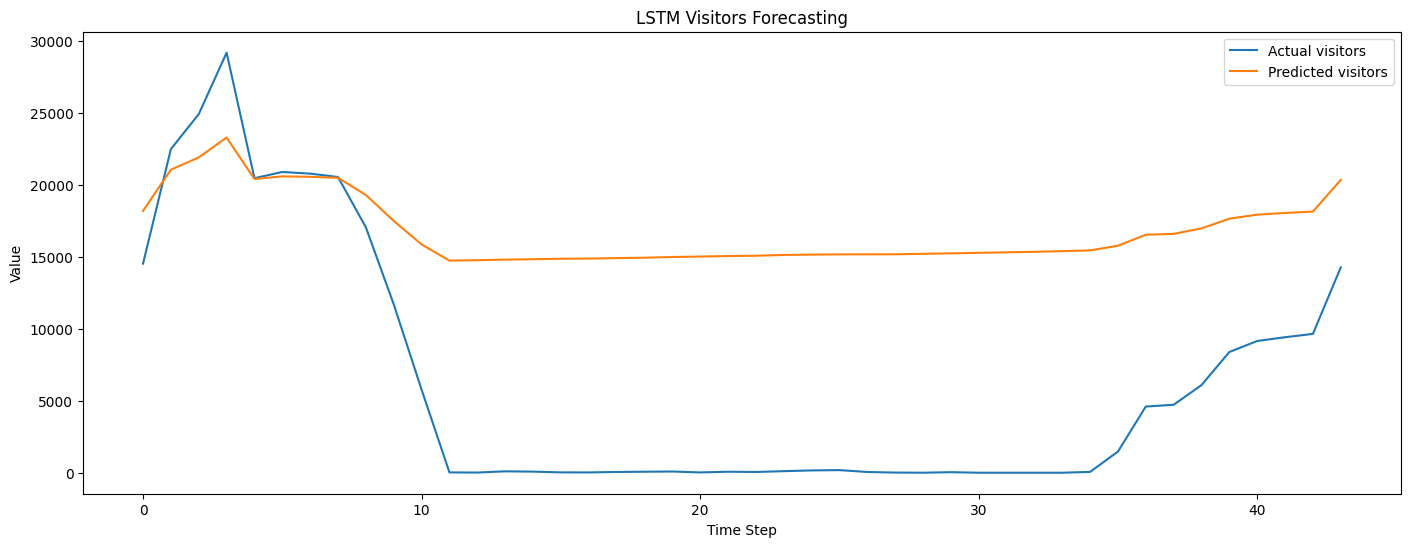

In [ ]:
# Plot the results for both targets (humidity and temperature)
plt.figure(figsize=(17, 6))

plt.plot(y_test3['total_visitor'], label='Actual visitors')
plt.plot(y_pred3['total_visitor'], label='Predicted visitors')

plt.title('LSTM Visitors Forecasting')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()

plt.show()

In [ ]:
n_past3 = 1
n_month_for_prediction3 = 12
predict_period_month3 = pd.date_range(list(train_dates)[-n_past3],
                                     periods=n_month_for_prediction3, freq='M').tolist()
print(predict_period_month3)

[Timestamp('2022-12-31 00:00:00', freq='M'), Timestamp('2023-01-31 00:00:00', freq='M'), Timestamp('2023-02-28 00:00:00', freq='M'), Timestamp('2023-03-31 00:00:00', freq='M'), Timestamp('2023-04-30 00:00:00', freq='M'), Timestamp('2023-05-31 00:00:00', freq='M'), Timestamp('2023-06-30 00:00:00', freq='M'), Timestamp('2023-07-31 00:00:00', freq='M'), Timestamp('2023-08-31 00:00:00', freq='M'), Timestamp('2023-09-30 00:00:00', freq='M'), Timestamp('2023-10-31 00:00:00', freq='M'), Timestamp('2023-11-30 00:00:00', freq='M')]


In [ ]:
prediction3 = model3.predict(X_train3[-n_month_for_prediction3:])

1/1 [==============================] - 0s 23ms/step


In [ ]:
prediction3

array([[ 0.75207365, -0.58901167],
       [ 0.8624616 , -0.545521  ],
       [ 1.0641497 , -0.5062392 ],
       [ 1.0881081 , -0.49892676],
       [ 0.77616566, -0.5531508 ],
       [ 0.819726  , -0.5300537 ],
       [ 0.96248937, -0.4914633 ],
       [ 0.84678996, -0.5127551 ],
       [ 0.3625176 , -0.79232156],
       [ 0.50232   , -0.6604179 ],
       [ 0.6277522 , -0.56892604],
       [ 0.5510943 , -0.60718364]], dtype=float32)

In [ ]:
#mengambil kolom total visitor saja
prediction3 = scaler.inverse_transform(prediction3)[:,0]
prediction3

array([21405.295, 22436.066, 24319.375, 24543.092, 21630.26 , 22037.014,
       23370.098, 22289.729, 17767.729, 19073.164, 20244.414, 19528.605],
      dtype=float32)

<ipython-input-85-dabf75b3e11d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['datetime'] = pd.to_datetime(original['datetime'])


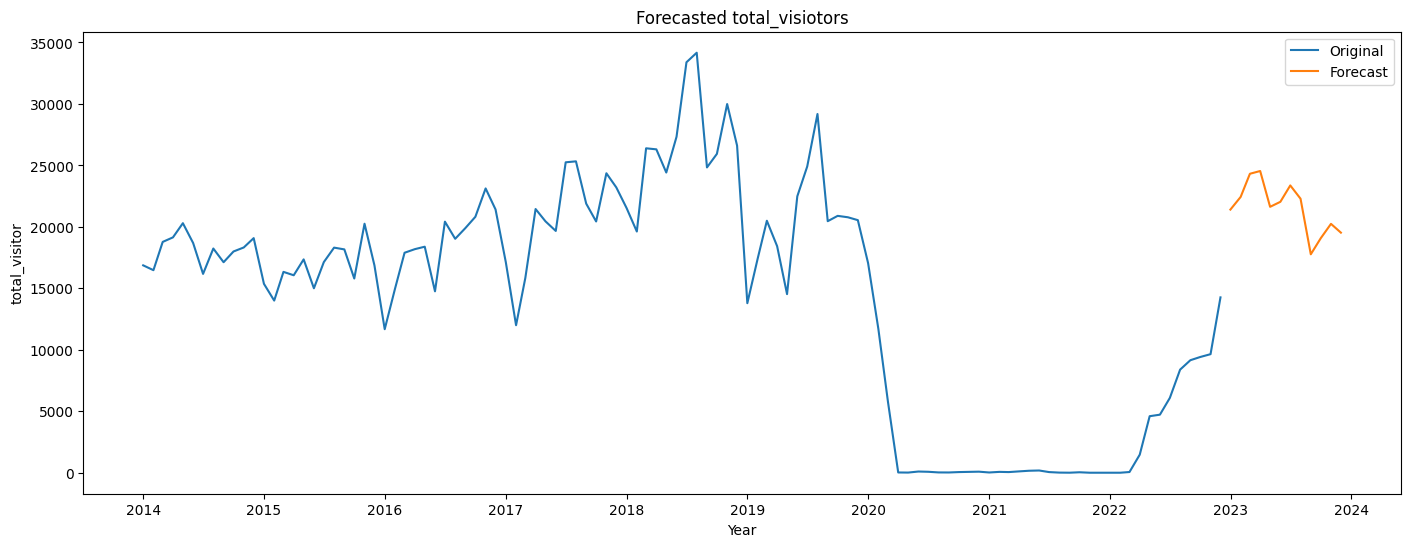

In [ ]:
forecast_dates = []

for time_i in predict_period_month3:
    forecast_dates.append(time_i.date())

df_forecast = pd.DataFrame({'Date': forecast_dates, 'total_visitor': prediction3})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])

# Assuming 'original' contains the original data with 'Datetime' and 'jumlah_penderita' columns
original = jatim[['datetime','total_visitor']]
original['datetime'] = pd.to_datetime(original['datetime'])
original = original.loc[original['datetime'] >= '2013-01-01']

#plot hasil
plt.figure(figsize=(17, 6))
sns.lineplot(data=original, x='datetime', y='total_visitor', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='total_visitor', label='Forecast')
plt.xlabel('Year')
plt.ylabel('total_visitor')
plt.title('Forecasted total_visiotors')
plt.legend()
plt.show()


# Generate the forecast dates from January 2023 to December 2023
forecast_dates_1 = pd.date_range(start='2023-01-01', end='2023-12-01', freq='MS')

# Create a list of forecast dates and prediction values
data = list(zip(forecast_dates_1, prediction3))

In [ ]:
from tabulate import tabulate

In [ ]:
# Create a list of headers for the table
headers = ['Date', 'Prediction']
table = tabulate(data, headers=headers, tablefmt='fancy_grid')
# Print the table
print(table)

╒═════════════════════╤══════════════╕
│ Date                │   Prediction │
╞═════════════════════╪══════════════╡
│ 2023-01-01 00:00:00 │      21405.3 │
├─────────────────────┼──────────────┤
│ 2023-02-01 00:00:00 │      22436.1 │
├─────────────────────┼──────────────┤
│ 2023-03-01 00:00:00 │      24319.4 │
├─────────────────────┼──────────────┤
│ 2023-04-01 00:00:00 │      24543.1 │
├─────────────────────┼──────────────┤
│ 2023-05-01 00:00:00 │      21630.3 │
├─────────────────────┼──────────────┤
│ 2023-06-01 00:00:00 │      22037   │
├─────────────────────┼──────────────┤
│ 2023-07-01 00:00:00 │      23370.1 │
├─────────────────────┼──────────────┤
│ 2023-08-01 00:00:00 │      22289.7 │
├─────────────────────┼──────────────┤
│ 2023-09-01 00:00:00 │      17767.7 │
├─────────────────────┼──────────────┤
│ 2023-10-01 00:00:00 │      19073.2 │
├─────────────────────┼──────────────┤
│ 2023-11-01 00:00:00 │      20244.4 │
├─────────────────────┼──────────────┤
│ 2023-12-01 00:00:00 │  